# Data Cleaning

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [226]:
reviews = pd.read_csv('./data/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,67483,178804,2011-02-06,74805,Nathan,We had a wonderful stay! It's a beautiful hous...
2,67483,186099,2011-02-21,41558,Rajeev,Looks like my last review didn't get posted. \...
3,67483,215731,2011-04-03,368549,Sarah-Marie,I visited DC with my boyfriend from Germany. C...
4,67483,255742,2011-05-08,530299,Marci,The upstairs apartment was charming and comfor...


In [227]:
listings = pd.read_csv('./data/listings.csv')
df = listings.copy()

df['price_num'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

df['taken_30'] = 30-df['availability_30']
df['taken_60'] = 60-df['availability_60']

df['sales_30'] = df['taken_30'] * df['price_num']
df['sales_60'] = df['taken_60'] * df['price_num']

# Column types
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [228]:
# Calculate Q1 (25th percentile of the data) for the 'price' column
Q1 = df['sales_30'].quantile(0.25)

# Calculate Q3 (75th percentile of the data) for the 'price' column
Q3 = df['sales_30'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['sales_30'] <= upper_bound)]

In [230]:
# Extract numbers of bedrooms from the 'name' column using regular expressions
df_filtered['bedrooms_real'] = df_filtered['name'].str.extract(r'(\d+)\s*bedroom', flags=re.IGNORECASE)

# Convert the extracted values to numeric data type
df_filtered['bedrooms_real'] = pd.to_numeric(df_filtered['bedrooms_real'], errors='coerce')

df_filtered['bathrooms_real'] = df_filtered['bathrooms_text'].str.extract(r'(\d+\.?\d*)').astype(float)

/tmp/ipykernel_92154/2126326370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bedrooms_real'] = df_filtered['name'].str.extract(r'(\d+)\s*bedroom', flags=re.IGNORECASE)
/tmp/ipykernel_92154/2126326370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bedrooms_real'] = pd.to_numeric(df_filtered['bedrooms_real'], errors='coerce')
/tmp/ipykernel_92154/2126326370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [251]:
df_filtered

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,taken_30,taken_60,sales_30,sales_60,bedrooms_real,bathrooms_real
0,3686,https://www.airbnb.com/rooms/3686,20231218032619,2023-12-18,city scrape,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,NaN,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., DC","I am a literary scholar, teacher, poet, vegan ...",NaN,NaN,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.863390,-76.988890,Private room in home,Private room,1,NaN,1 private bath,NaN,1.0,[],$67.00,31,365,31,31,365,365,31.0,365.0,NaN,t,30,60,90,365,2023-12-18,84,3,0,2010-11-01,2023-08-30,4.64,4.73,4.45,4.91,4.84,3.91,4.64,NaN,f,1,0,1,0,0.53,67.0,0,0,0.0,0.0,1.0,1.0
1,3943,https://www.airbnb.com/rooms/3943,20231218032619,2023-12-18,city scrape,Townhouse in Washington · ★4.83 · 1 bedroom · ...,NaN,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/airflow/Hosti...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, DC",I travel often and always try to immerse mysel...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,5,5,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.911950,-77.004560,Private room in townhouse,Private room,2,NaN,1 private bath,NaN,1.0,[],$66.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,8,11,11,252,2023-12-18,495,46,2,2009-05-10,2023-11-22,4.83,4.88,4.92,4.94,4.91,4.57,4.75,Hosted License: 5007242201001033,f,5,0,5,0,2.78,66.0,22,49,1452.0,3234.0,1.0,1.0
2,4197,https://www.airbnb.com/rooms/4197,20231218032619,2023-12-18,city scrape,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,NaN,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/miso/Hosting-...,5061,https://www.airbnb.com/users/show/5061,Sandra,2008-12-12,"Washington D.C., DC",I’m a California native who came to work for t...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/93c77...,https://a0.muscache.com/im/pictures/user/93c77...,Capitol Hill,2,2,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",NaN,38.887190,-76.994720,Private room in home,Private room,1,NaN,1.5 shared baths,NaN,1.0,[],$135.00,7,1125,7,7,1125,1125,7.0,1125.0,NaN,t,6,21,51,321,2023-12-18,58,6,0,2009

# Exploration

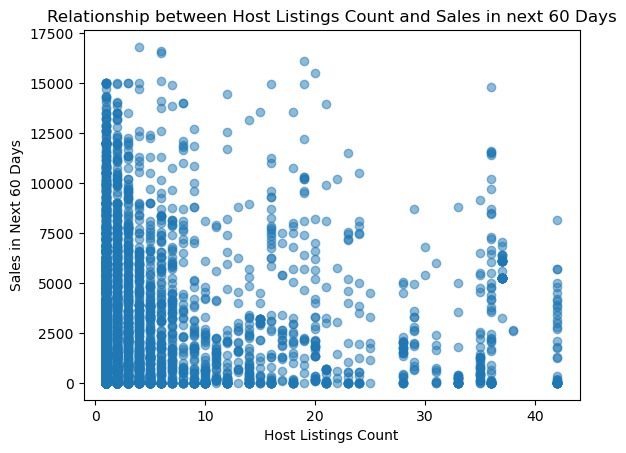

In [231]:
plt.scatter(df_filtered[df_filtered['host_listings_count'] < 51]['host_listings_count'], df_filtered[df_filtered['host_listings_count'] < 51]['sales_60'], alpha=0.5)
plt.xlabel('Host Listings Count')
plt.ylabel('Sales in Next 60 Days')
plt.title('Relationship between Host Listings Count and Sales in next 60 Days')
plt.show()

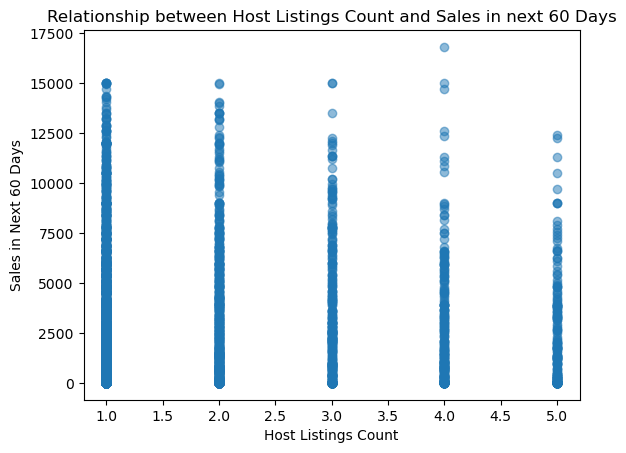

In [232]:
plt.scatter(df_filtered[df_filtered['host_listings_count'] < 6]['host_listings_count'], df_filtered[df_filtered['host_listings_count'] < 6]['sales_60'], alpha=0.5)
plt.xlabel('Host Listings Count')
plt.ylabel('Sales in Next 60 Days')
plt.title('Relationship between Host Listings Count and Sales in next 60 Days')
plt.show()

Should group by host, above graphs do not mean too much

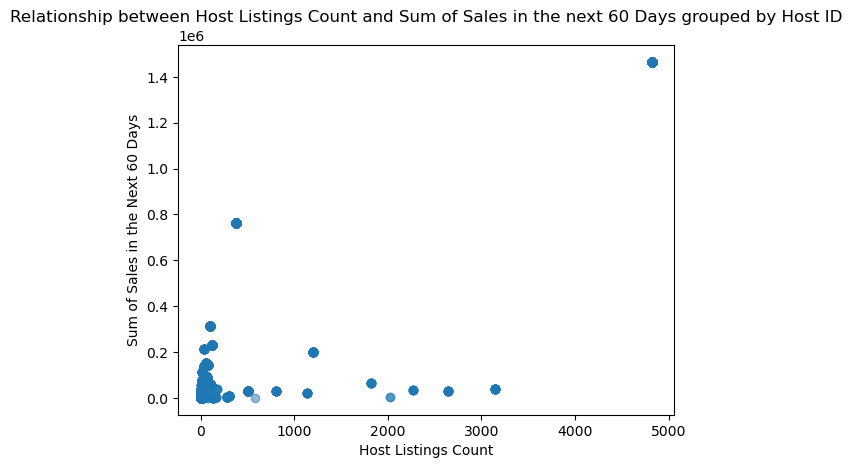

In [233]:
grouped_df = df_filtered.groupby('host_id')['sales_60'].sum().reset_index()

merged_df = pd.merge(grouped_df, df_filtered[['host_id', 'host_listings_count']], on='host_id', how='left')

plt.scatter(merged_df['host_listings_count'], merged_df['sales_60'],alpha=.5)
plt.xlabel('Host Listings Count')
plt.ylabel('Sum of Sales in the Next 60 Days')
plt.title('Relationship between Host Listings Count and Sum of Sales in the next 60 Days grouped by Host ID')
plt.show()

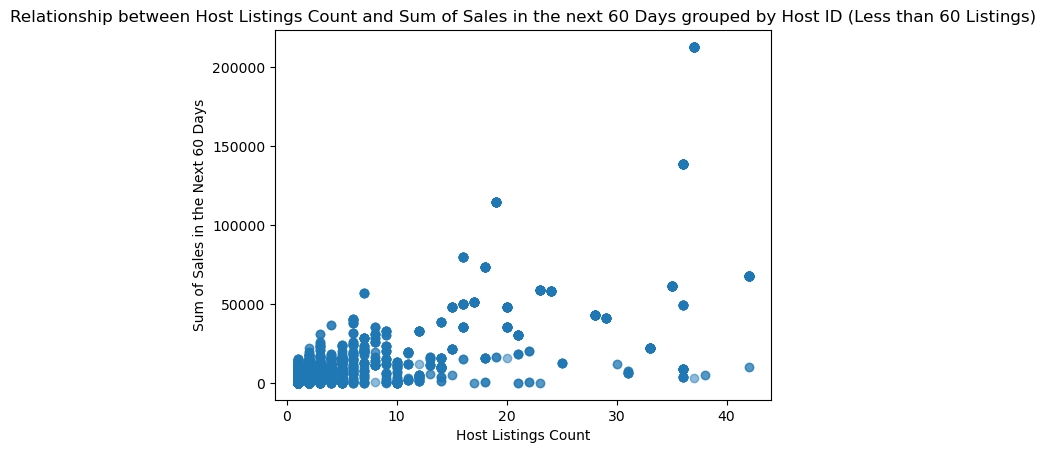

In [234]:
filtered_df = merged_df[merged_df['host_listings_count'] < 50]

# Plot the filtered data
plt.scatter(filtered_df['host_listings_count'], filtered_df['sales_60'], alpha=0.5)
plt.xlabel('Host Listings Count')
plt.ylabel('Sum of Sales in the Next 60 Days')
plt.title('Relationship between Host Listings Count and Sum of Sales in the next 60 Days grouped by Host ID (Less than 60 Listings)')
plt.show()

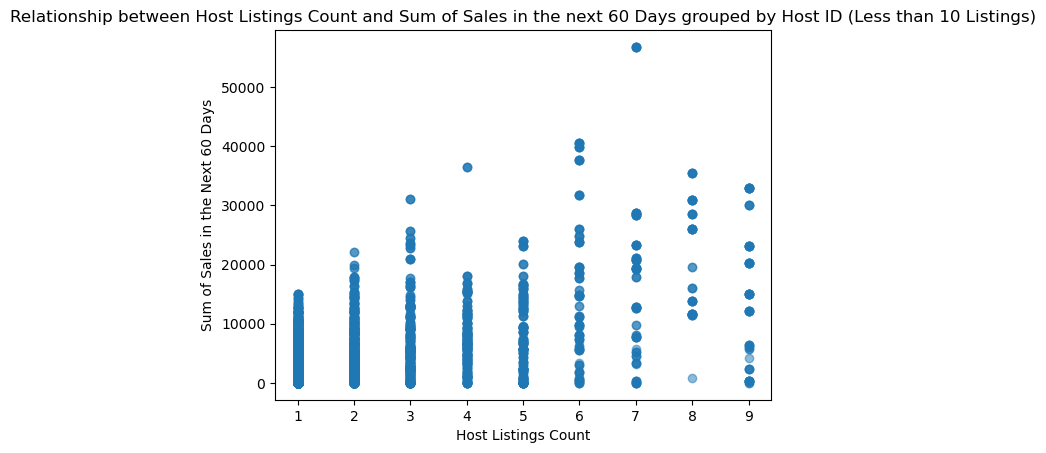

In [235]:
filtered_df = merged_df[merged_df['host_listings_count'] < 10]

# Plot the filtered data
plt.scatter(filtered_df['host_listings_count'], filtered_df['sales_60'], alpha=0.5)
plt.xlabel('Host Listings Count')
plt.ylabel('Sum of Sales in the Next 60 Days')
plt.title('Relationship between Host Listings Count and Sum of Sales in the next 60 Days grouped by Host ID (Less than 10 Listings)')
plt.show()

/tmp/ipykernel_92154/2831657287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['host_since'] = pd.to_datetime(df_filtered['host_since'])


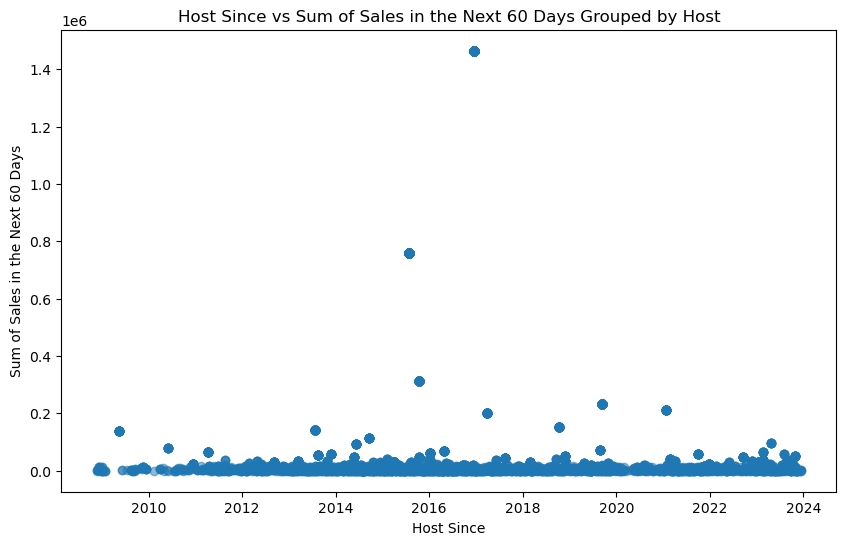

In [236]:
df_filtered['host_since'] = pd.to_datetime(df_filtered['host_since'])

# Group by 'host_id' and sum 'sales_60'
grouped_sales = df_filtered.groupby('host_id')['sales_60'].sum().reset_index()

# Merge with 'host_since'
merged_df = pd.merge(grouped_sales, df_filtered[['host_id', 'host_since']], on='host_id', how='left')

# Plot 'host_since' vs sum of 'sales_60'
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['host_since'], merged_df['sales_60'], alpha=0.5)
plt.xlabel('Host Since')
plt.ylabel('Sum of Sales in the Next 60 Days')
plt.title('Host Since vs Sum of Sales in the Next 60 Days Grouped by Host')
plt.show()

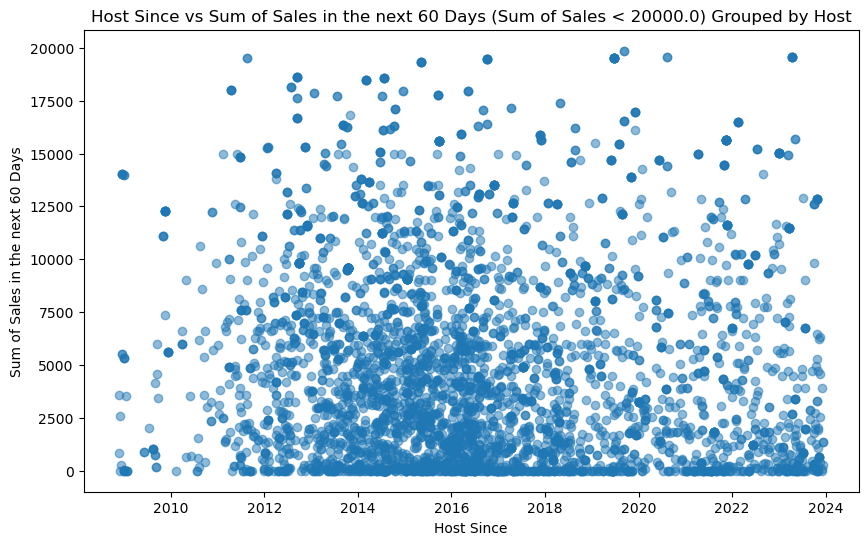

In [237]:


# Filter where sum of sales is under 400000.0
filtered_df = merged_df[merged_df['sales_60'] < 20000.0]

# Plot 'host_since' vs sum of 'sales_60'
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['host_since'], filtered_df['sales_60'], alpha=0.5)
plt.xlabel('Host Since')
plt.ylabel('Sum of Sales in the next 60 Days')
plt.title('Host Since vs Sum of Sales in the next 60 Days (Sum of Sales < 20000.0) Grouped by Host')
plt.show()

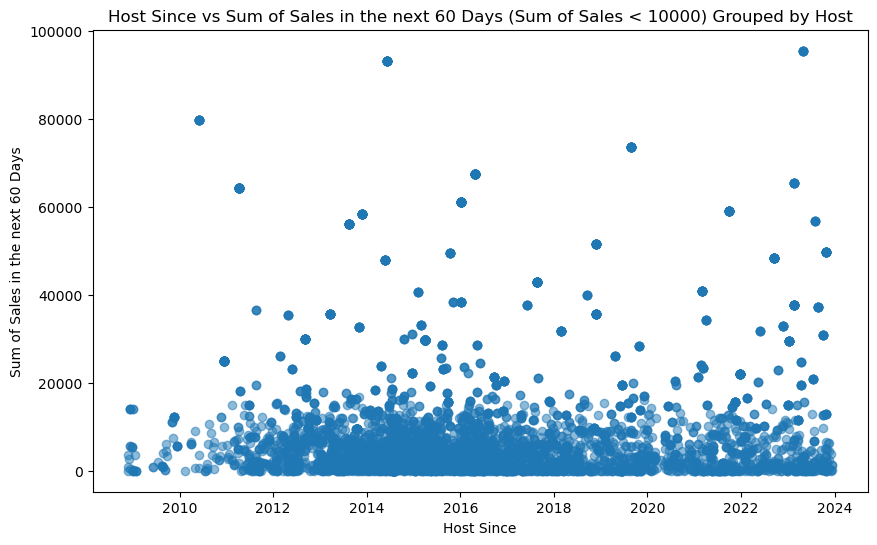

In [238]:

# Filter where sum of sales is under 400000.0
filtered_df = merged_df[merged_df['sales_60'] < 100000.0]

# Plot 'host_since' vs sum of 'sales_60'
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['host_since'], filtered_df['sales_60'], alpha=0.5)
plt.xlabel('Host Since')
plt.ylabel('Sum of Sales in the next 60 Days')
plt.title('Host Since vs Sum of Sales in the next 60 Days (Sum of Sales < 10000) Grouped by Host')
plt.show()

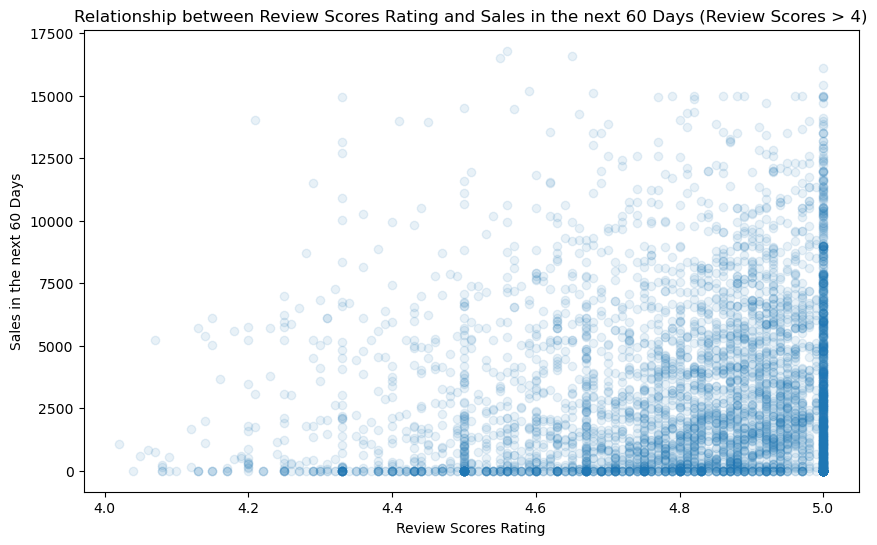

In [239]:

# Filter the DataFrame for review_scores_rating over 4
filtered_df = df_filtered[df_filtered['review_scores_rating'] > 4]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['review_scores_rating'], filtered_df['sales_60'], alpha=0.1)
plt.xlabel('Review Scores Rating')
plt.ylabel('Sales in the next 60 Days')
plt.title('Relationship between Review Scores Rating and Sales in the next 60 Days (Review Scores > 4)')
plt.show()


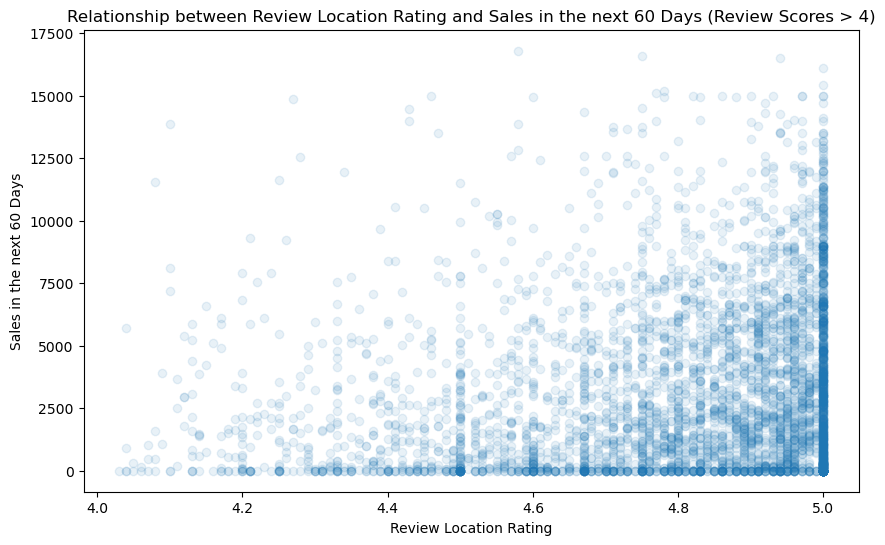

In [240]:

# Filter the DataFrame for review_scores_rating over 4
filtered_df = df_filtered[df_filtered['review_scores_location'] > 4]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['review_scores_location'], filtered_df['sales_60'], alpha=0.1)
plt.xlabel('Review Location Rating')
plt.ylabel('Sales in the next 60 Days')
plt.title('Relationship between Review Location Rating and Sales in the next 60 Days (Review Scores > 4)')
plt.show()

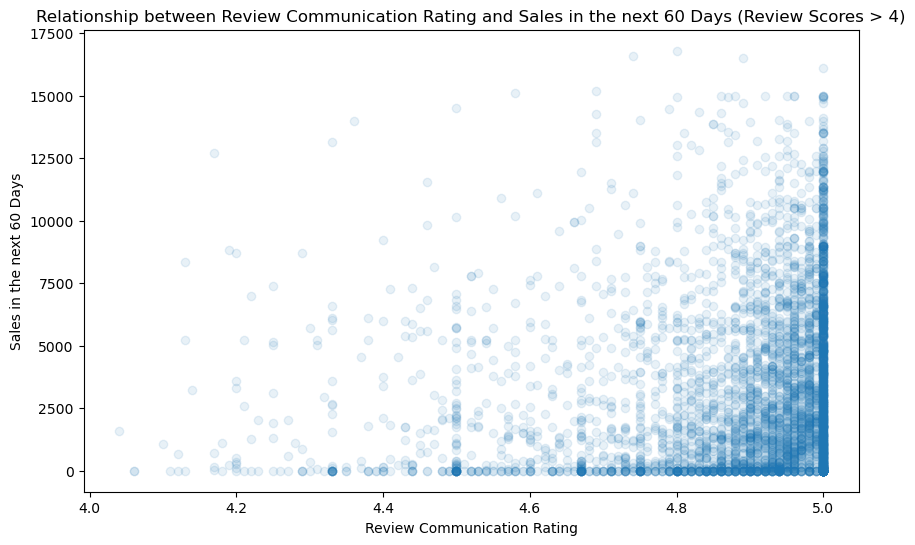

In [241]:

# Filter the DataFrame for review_scores_rating over 4
filtered_df = df_filtered[df_filtered['review_scores_communication'] > 4]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['review_scores_communication'], filtered_df['sales_60'], alpha=0.1)
plt.xlabel('Review Communication Rating')
plt.ylabel('Sales in the next 60 Days')
plt.title('Relationship between Review Communication Rating and Sales in the next 60 Days (Review Scores > 4)')
plt.show()

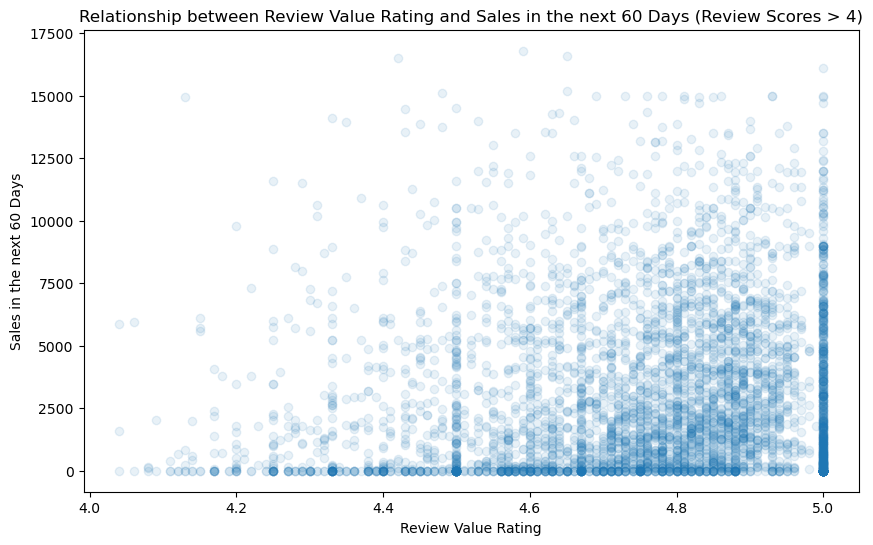

In [242]:

# Filter the DataFrame for review_scores_rating over 4
filtered_df = df_filtered[df_filtered['review_scores_value'] > 4]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['review_scores_value'], filtered_df['sales_60'], alpha=0.1)
plt.xlabel('Review Value Rating')
plt.ylabel('Sales in the next 60 Days')
plt.title('Relationship between Review Value Rating and Sales in the next 60 Days (Review Scores > 4)')
plt.show()

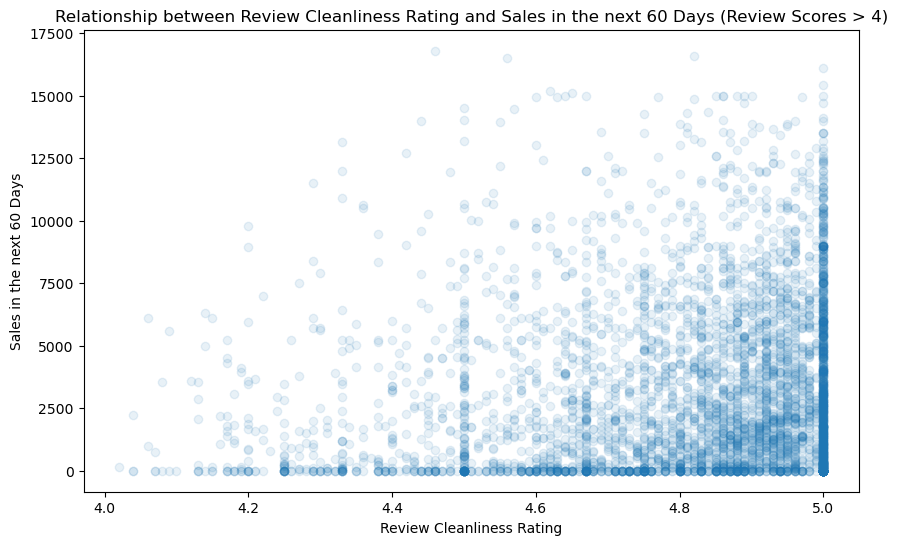

In [243]:

# Filter the DataFrame for review_scores_rating over 4
filtered_df = df_filtered[df_filtered['review_scores_cleanliness'] > 4]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['review_scores_cleanliness'], filtered_df['sales_60'], alpha=0.1)
plt.xlabel('Review Cleanliness Rating')
plt.ylabel('Sales in the next 60 Days')
plt.title('Relationship between Review Cleanliness Rating and Sales in the next 60 Days (Review Scores > 4)')
plt.show()

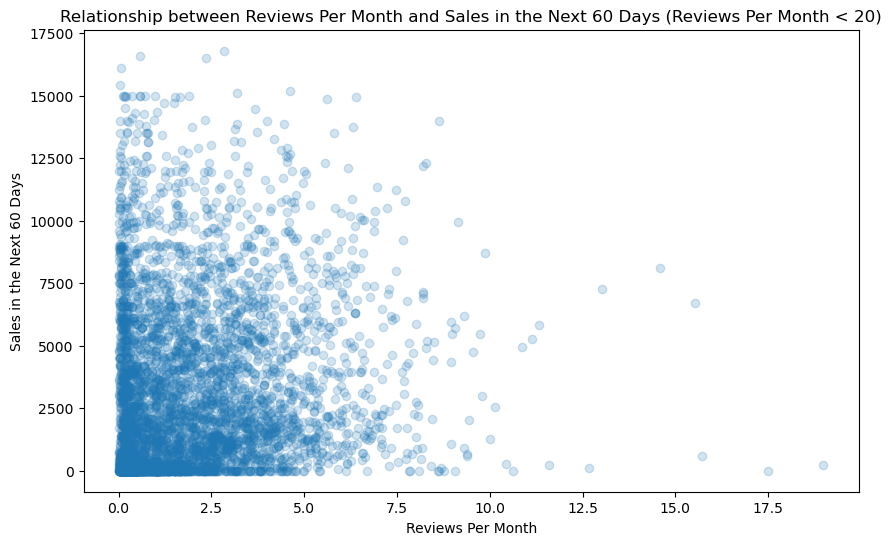

In [244]:
filtered_df = df_filtered[df_filtered['reviews_per_month'] < 20]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['reviews_per_month'], filtered_df['sales_60'], alpha=0.2)
plt.xlabel('Reviews Per Month')
plt.ylabel('Sales in the Next 60 Days')
plt.title('Relationship between Reviews Per Month and Sales in the Next 60 Days (Reviews Per Month < 20)')
plt.show()

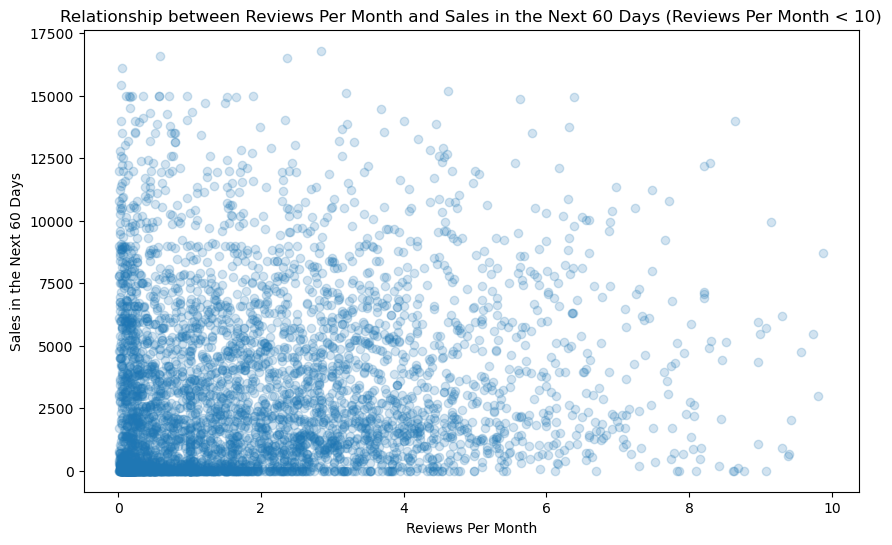

In [245]:
# Filter the DataFrame for reviews_per_month under 10
filtered_df = df_filtered[df_filtered['reviews_per_month'] < 10]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['reviews_per_month'], filtered_df['sales_60'], alpha=0.2)
plt.xlabel('Reviews Per Month')
plt.ylabel('Sales in the Next 60 Days')
plt.title('Relationship between Reviews Per Month and Sales in the Next 60 Days (Reviews Per Month < 10)')
plt.show()

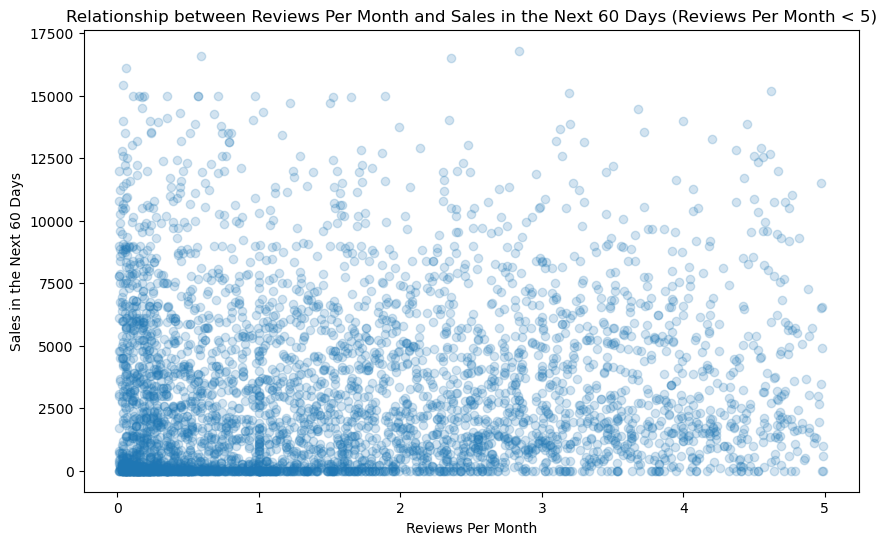

In [246]:
# Filter the DataFrame for reviews_per_month under 10
filtered_df = df_filtered[df_filtered['reviews_per_month'] < 5]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['reviews_per_month'], filtered_df['sales_60'], alpha=0.2)
plt.xlabel('Reviews Per Month')
plt.ylabel('Sales in the Next 60 Days')
plt.title('Relationship between Reviews Per Month and Sales in the Next 60 Days (Reviews Per Month < 5)')
plt.show()

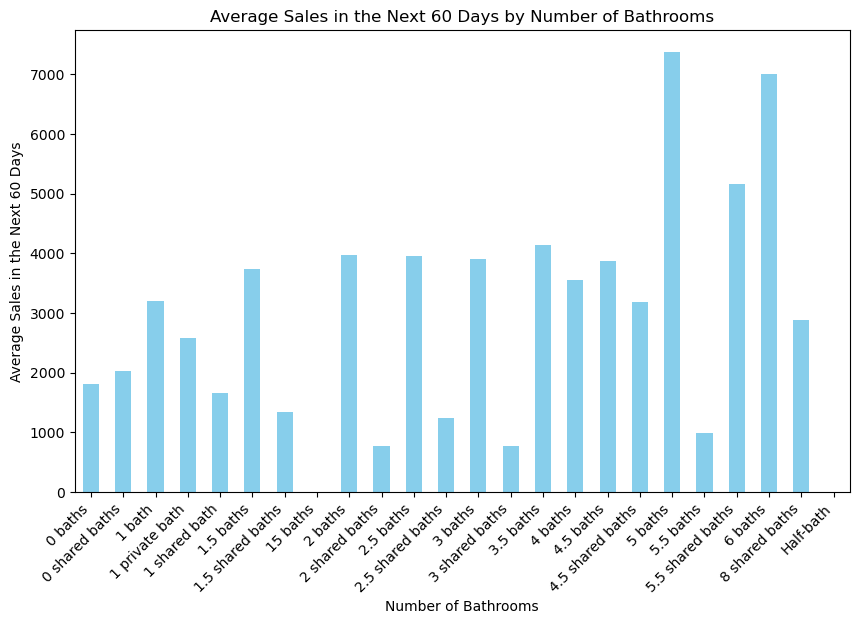

In [247]:
# Group by 'bathrooms_text' and calculate the average sales_60 for each group
average_sales_by_bathrooms = df_filtered.groupby('bathrooms_text')['sales_60'].mean()

# Plot the average sales_60 grouped by the number of bathrooms
plt.figure(figsize=(10, 6))
average_sales_by_bathrooms.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Sales in the Next 60 Days')
plt.title('Average Sales in the Next 60 Days by Number of Bathrooms')
plt.xticks(rotation=45, ha='right')
plt.show()

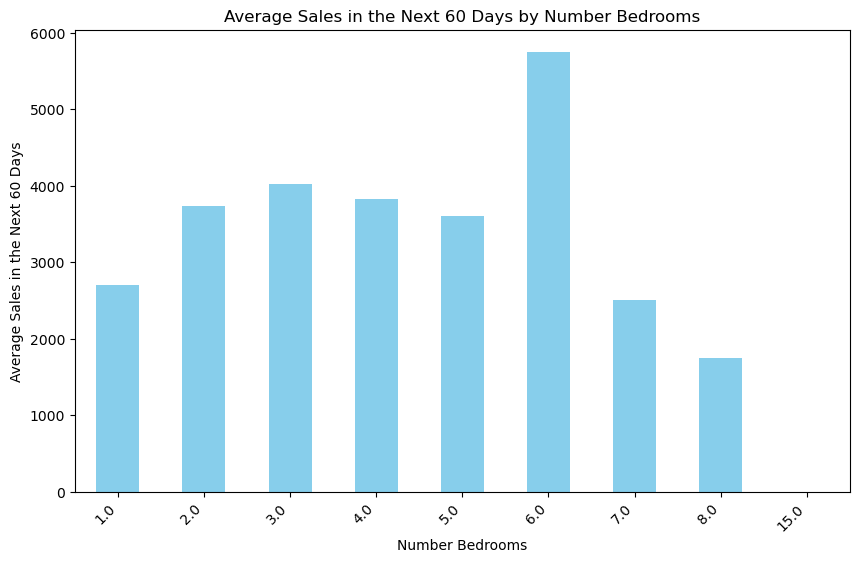

In [248]:
average_sales_by_bedrooms= df_filtered.groupby('bedrooms_real')['sales_60'].mean()

# Plot the average sales_60 grouped by the number of beds
plt.figure(figsize=(10, 6))
average_sales_by_bedrooms.plot(kind='bar', color='skyblue')
plt.xlabel('Number Bedrooms')
plt.ylabel('Average Sales in the Next 60 Days')
plt.title('Average Sales in the Next 60 Days by Number Bedrooms')
plt.xticks(rotation=45, ha='right')
plt.show()

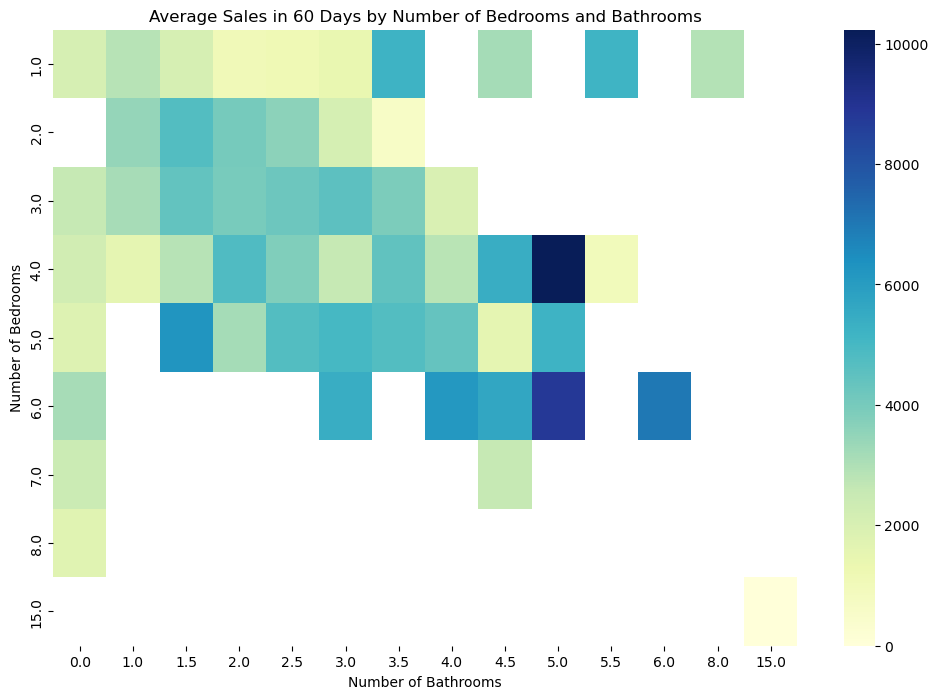

In [258]:
# Pivot the dataframe to prepare for heatmap
pivot_df = df_filtered.pivot_table(index='bedrooms_real', columns='bathrooms_real', values='sales_60', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=False, fmt=".2f", cmap="YlGnBu")
plt.title('Average Sales in 60 Days by Number of Bedrooms and Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')
plt.show()

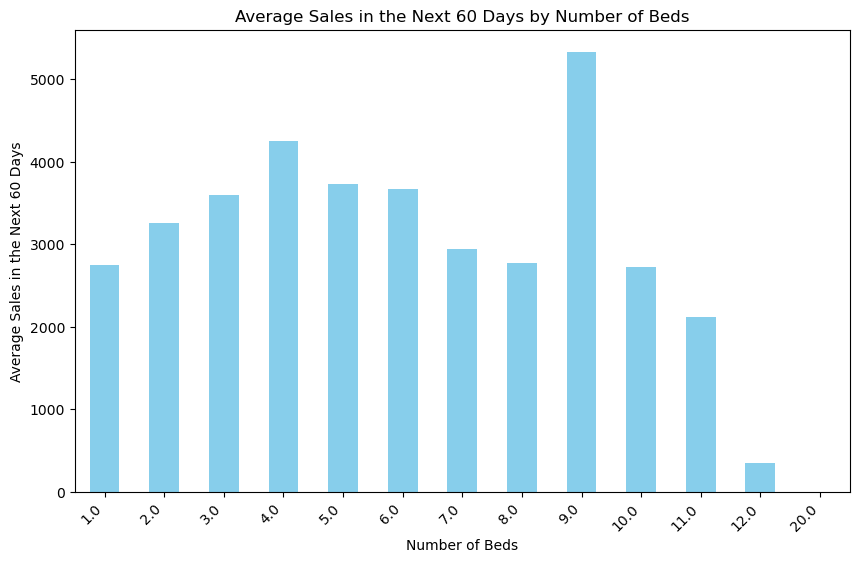

In [249]:
average_sales_by_beds = df_filtered.groupby('beds')['sales_60'].mean()

# Plot the average sales_60 grouped by the number of beds
plt.figure(figsize=(10, 6))
average_sales_by_beds.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Beds')
plt.ylabel('Average Sales in the Next 60 Days')
plt.title('Average Sales in the Next 60 Days by Number of Beds')
plt.xticks(rotation=45, ha='right')
plt.show()

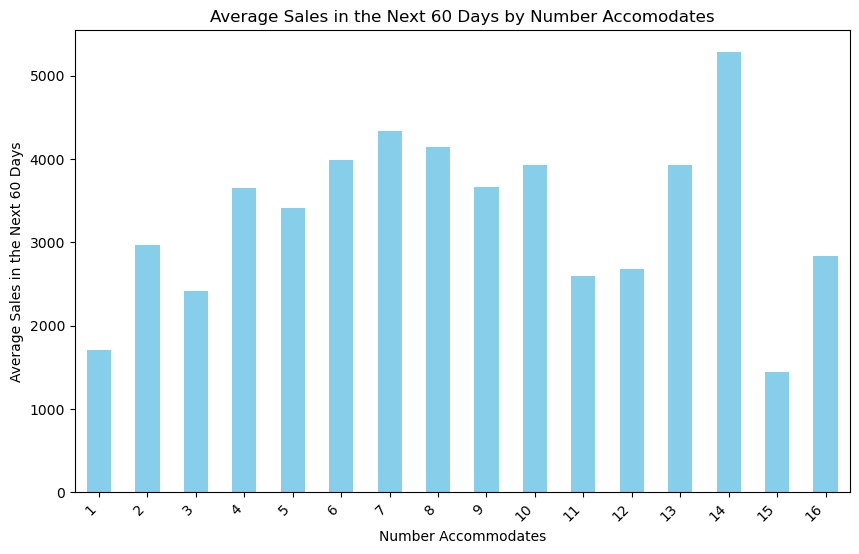

In [250]:
average_sales_by_accom = df_filtered.groupby('accommodates')['sales_60'].mean()

# Plot the average sales_60 grouped by the number of beds
plt.figure(figsize=(10, 6))
average_sales_by_accom.plot(kind='bar', color='skyblue')
plt.xlabel('Number Accommodates')
plt.ylabel('Average Sales in the Next 60 Days')
plt.title('Average Sales in the Next 60 Days by Number Accomodates')
plt.xticks(rotation=45, ha='right')
plt.show()